Bağımsız İki Örneklem T Testi(AB) : İki grup ortalaması arasında karşılaştırma yapmak istenildiğinde kullanılır.

In [3]:
import pandas as pd
import numpy as np
#Veri Tipi 1
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B],axis = 1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [4]:
#Veri Tipi 2
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

Grup_A = np.arange(len(A))
Grup_A = pd.DataFrame(Grup_A)
Grup_A[:] = "A"
A = pd.concat([A,Grup_A],axis = 1)

Grup_B = np.arange(len(B))
Grup_B = pd.DataFrame(Grup_B)
Grup_B[:] = "B"
B = pd.concat([B,Grup_B],axis = 1)

#Tüm Veri
AB = pd.concat([A,B])
AB.columns = ["gelir","Grup"]
print(AB.head())
print(AB.tail())

   gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


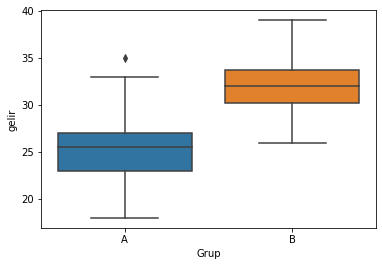

In [5]:
import seaborn as sns
sns.boxplot(x = "Grup",y = "gelir",data = AB);

In [6]:
#Varsayım Kontrolü

In [7]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
AB.head()

,gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [31]:
#normallik varsayımı
from scipy.stats import shapiro
import scipy.stats as stats

In [32]:
shapiro(A_B.A)
#p-value > alfa

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [33]:
shapiro(A_B.B)
#p_value > alfa

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

In [34]:
#Varyans homojenliği varsayımı

H0 : Varyanslar homojendir
H1 : Varyanslar homojen değildir

In [35]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

p-value > alfa(0.05)

In [36]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

pvalue < alfa

In [37]:
statistic,pvalue = stats.ttest_ind(A_B["A"],A_B["B"],equal_var = True)
print("Test istatistiği = %.4f,p değeri = %.4f" % (statistic,pvalue))

Test istatistiği = -7.0287,p değeri = 0.0000


Eski sistem ile yeni sistem arasında gelirler göz önünde bulundurulduğunda anlamlı bir fark vardır.Bu fark yeni sistem lehinedir.

Nonparametrik Bağımsız İki Örneklem Testi

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B],axis = 1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [3]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [4]:
test_istatistigi,pvalue = stats.mannwhitneyu(A_B["A"],A_B["B"])
print("Test İstatistiği : %.4f, p-değeri : %.4f" % (test_istatistigi,pvalue))

Test İstatistiği : 89.5000, p-değeri : 0.0000
